 Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
Creating new offset file...
.
.
33  samples , 1.0151138305664062  time passed
32.5086694775766  samples per second 


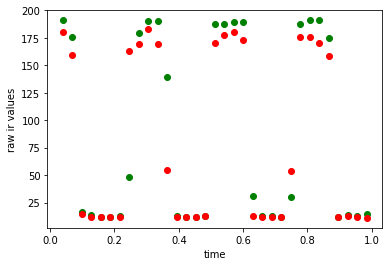

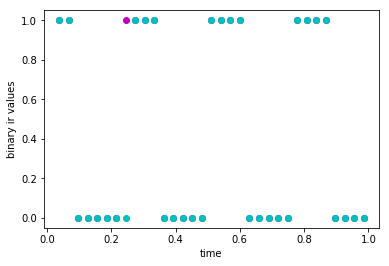

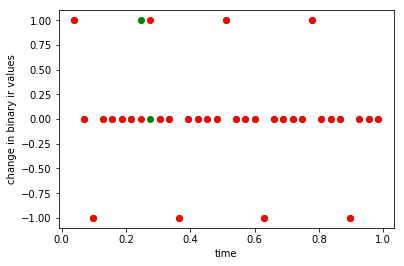

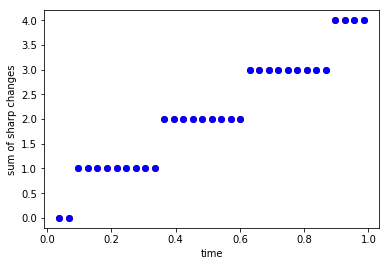

In [15]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib.pyplot as plt
import time

#this is the amount of time you want to take samples for
time_out = 1
motor_speed = 40
ir_threshold = 140

samples_taken = 0

zumi = Zumi()
zumi.reset_gyro()
zumi.mpu.calibrate_MPU()
init_time = time.time()

#create list for the readings to be graphed
time_list = []

left_bricks_list = []
right_bricks_list = []

r_ir_list = []
l_ir_list = []

BRIR_list = []
BLIR_list = []

D_BRIR_list = []
D_BLIR_list = []

#create variables for calculating derivative
BLI_past = 0
BRI_past = 0

DBLI = 0
DBRI = 0

LBRICKS = 0
RBRICKS = 0

time_passed = 0
time_first_brick = 0
try:
    while(time_passed < time_out):

        zumi.go_straight(motor_speed,0)

        ir_readings = zumi.get_all_IR_data()
        bottom_right_ir = ir_readings[1]
        bottom_left_ir = ir_readings[3]

        if bottom_right_ir > ir_threshold:
            BRI = 1  
        else:
            BRI = 0

        if bottom_left_ir > ir_threshold:
            BLI = 1   
        else:
            BLI = 0

        
        #change in right ir    
        DBRI = BLI - BLI_past

        #change in left ir
        DBLI = BRI - BRI_past

        #if DBLI == 1:#rising edge start of brick
        if DBLI == -1:#falling edge or end of brick
            LBRICKS = LBRICKS + 1
        #if DBRI == 1 :#rising edge or start of brick
        if DBRI == -1:#falling edge or end of brick
            RBRICKS = RBRICKS + 1

        #update past Binary Left IR (BLI)
        BLI_past = BLI
        #update past Binary Right IR (BRI)
        BRI_past = BRI

        time_passed = time.time()-init_time
        if time_passed > time_out:
            break

        if DBLI == -1 and LBRICKS ==1:
            time_first_brick = time_passed

        #add data to lists
        BRIR_list.append(BRI)
        BLIR_list.append(BLI)
        time_list.append(time_passed)
        right_bricks_list.append(RBRICKS)
        left_bricks_list.append(LBRICKS)
        r_ir_list.append(bottom_right_ir)
        l_ir_list.append(bottom_left_ir)
        D_BRIR_list.append(DBRI)
        D_BLIR_list.append(DBLI)
finally:    
    zumi.stop()
    
samples_taken=len(BRIR_list) 

print(samples_taken," samples ,", time_passed," time passed")
print(samples_taken/time_passed," samples per second ")

plt.plot(time_list,l_ir_list,'go',time_list,r_ir_list,'ro')
plt.ylabel('raw ir values')
plt.xlabel('time')
plt.show()

plt.plot(time_list,BRIR_list,'mo',time_list,BLIR_list,'co')
plt.ylabel('binary ir values')
plt.xlabel('time')
plt.show()

plt.plot(time_list,D_BLIR_list,'go',time_list,D_BRIR_list,'ro')
plt.ylabel('change in binary ir values')
plt.xlabel('time')
plt.show()

plt.plot(time_list,left_bricks_list,'ro',time_list,right_bricks_list,'bo')
plt.ylabel('sum of sharp changes')
plt.xlabel('time')
plt.show()


In [2]:
zumi.stop()

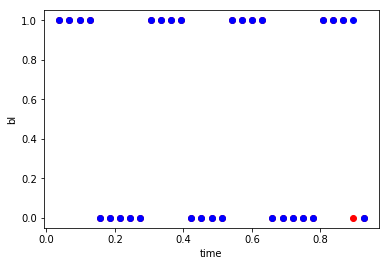

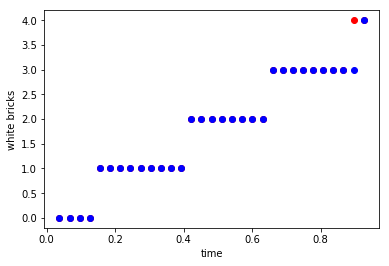

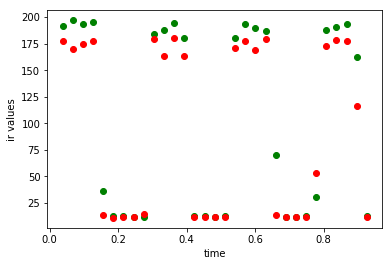

In [5]:
plt.plot(time_list,BRIR_list,'ro',time_list,BLIR_list,'bo')
plt.ylabel('bl')
plt.xlabel('time')
plt.show()

plt.plot(time_list,left_list,'ro',time_list,right_list,'bo')
plt.ylabel('white bricks')
plt.xlabel('time')
plt.show()

plt.plot(time_list,l_ir_list,'go',time_list,r_ir_list,'ro')
plt.ylabel('ir values')
plt.xlabel('time')
plt.show()